1595000 [1660866.66666667] [-65866.66666667] [-4.12957158]
4495000 [4517075.] [-22075.] [-0.49110122]
7695000 [8079050.] [-384050.] [-4.99090318]
5295000 [5009350.] [285650.] [5.39471199]
8750000 [9151250.] [-401250.] [-4.58571429]
3995000 [4231850.] [-236850.] [-5.92866083]
2150000 [2074280.] [75720.] [3.52186047]
2595000 [2458290.] [136710.] [5.26820809]
6195000 [5886650.] [308350.] [4.97740113]
5500000 [6876400.] [-1376400.] [-25.02545455]
5995000 [5156710.] [838290.] [13.98315263]
8745000 [9009800.] [-264800.] [-3.02801601]
7495000 [7703050.] [-208050.] [-2.77585057]
8795000 [9085800.] [-290800.] [-3.3064241]
9495000 [8668700.] [826300.] [8.70247499]
6495000 [6748600.] [-253600.] [-3.90454196]
1795000 [2010200.] [-215200.] [-11.98885794]
8495000 [8490200.] [4800.] [0.05650383]
3575000 [3590200.] [-15200.] [-0.42517483]
6495000 [6204150.] [290850.] [4.47806005]
3990000 [4631300.] [-641300.] [-16.0726817]
1799000 [1876890.] [-77890.] [-4.32962757]
6995000 [7369450.] [-374450.] [-5.35

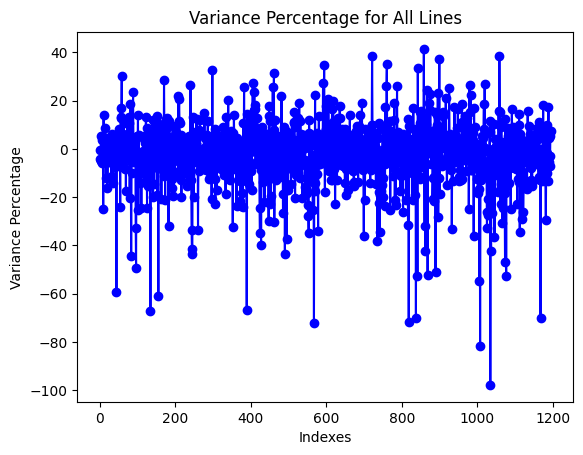

,Address,X,Y,Price,Type,Size,Squaremeter price,Energy class,Url,City
1007,Gurrevej 138,56.030023,12.574419,2495000,3,139,17949,4,https://www.dingeo.dk/adresse/3000-helsing%C3%...,3000


In [30]:
import joblib
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the saved model
model = joblib.load('./RFG_Model')

# Load the data
cities = ['2800', '2820', '2830', '2840', '2850', '2900', '2920', '2930', '2942', '2950', '3000', '3460']
dataframes = []

for city in cities:
    filename = f'./data/house_data/house_data_{city}.csv'
    df = pd.read_csv(filename)
    df["City"] = int(city)
    dataframes.append(df)

data = pd.concat(dataframes, ignore_index=True)
data.dropna(inplace=True)

# Select relevant features
features = ['X', 'Y', 'Size', 'Type', 'Energy class', 'City']
target = 'Price'

# Preprocess the data
label_encoders = {}
for feature in features:
    if data[feature].dtype == 'object':
        label_encoders[feature] = LabelEncoder()
        data[feature] = label_encoders[feature].fit_transform(data[feature])



predicted_prices = []

for idx, row in data.iterrows():


    linenumber = idx

    # Apply label encoding to the new house data 
    new_house = pd.DataFrame([[data.loc[linenumber, 'X'], data.loc[linenumber, 'Y'], data.loc[linenumber, 'Size'], 
                               data.loc[linenumber,'Type'],data.loc[linenumber, 'Energy class'], data.loc[linenumber, 'City']]], columns=features)
    
    for feature in features:
        if new_house[feature].dtype == 'object':
            new_house[feature] = label_encoders[feature].transform(new_house[feature])

    
    original_price = data.loc[linenumber, 'Price']
   

    # Make the prediction
    prediction = model.predict(new_house)


     # Calculate the variance
    variance = original_price - prediction

    
    variance_percent = (variance / original_price) * 100

    print(original_price, prediction, variance,variance_percent)

    # Create a temporary DataFrame with the current iteration's results
    temp_df = pd.DataFrame({'Predicted Price': [prediction],
                            'Original Price': [original_price],
                            'Variance': [variance],
                            'Variance %': [variance_percent]})
    temp_df['Address'] = data.loc[linenumber, 'Address']
    # Concatenate the temporary DataFrame with the df_results DataFrame
   
    predicted_prices.append(temp_df)
    
df_results = pd.concat(predicted_prices,ignore_index=True)

print(df_results)

mean_variance_percent = df_results['Variance %'].mean()

# Print the mean percentage variance
print("Mean Percentage Variance:", mean_variance_percent)


variance_percent = df_results['Variance %']

# Set a threshold for the variance percentage above/below which rows will be considered as high variance
variance_threshold = 100  # Adjust the threshold as per your requirement

# Create a new DataFrame to store rows with high variance
high_variance_df = df_results[(df_results['Variance %'] >= variance_threshold) | (df_results['Variance %'] <= -variance_threshold)]

# Reset the index of the new DataFrame
high_variance_df = high_variance_df.reset_index(drop=True)

# Save the high variance DataFrame 
high_variance_df

# Create an array of line numbers
line_numbers = range(len(variance_percent))

# Create the line plot
plt.plot(line_numbers, variance_percent, marker='o', linestyle='-', color='blue')

# Set labels and title
plt.xlabel('Indexes')
plt.ylabel('Variance Percentage')
plt.title('Variance Percentage for All Lines')

# Show the plot
plt.show()


data[data['Address']== 'Gurrevej 138']